In [1]:
#TAN KAI LOON TP063793
#dataset link: https://www.kaggle.com/datasets/ravidussilva/real-ai-art/data

import keras
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.models import Model
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# import zipfile
# import os

# def unzip_file(zip_file_path, extract_to):
#     with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_to)

# # Example usage
# zip_file_path = "C:\\Users\\erict\\Downloads\\Real_AI_SD_LD_Dataset.zip"
# extract_to = "C:\\Users\\erict\\OneDrive - Asia Pacific University\\Documents\\level 3\\deep learning"

# unzip_file(zip_file_path, extract_to)

In [2]:
import numpy as np
import pandas as pd
import os

train="C:\\Users\\user10\\Desktop\\Real_AI_SD_LD_Dataset1\\Real_AI_SD_LD_Dataset\\train"
test="C:\\Users\\user10\\Desktop\\Real_AI_SD_LD_Dataset1\\Real_AI_SD_LD_Dataset\\test"

In [4]:
train_labels = os.listdir(train)
test_labels = os.listdir(test)

print("Original Training labels:", train_labels)
print("Original Testing labels:", test_labels)

Original Training labels: ['AI_LD_art_nouveau', 'AI_LD_baroque', 'AI_LD_expressionism', 'AI_LD_impressionism', 'AI_LD_post_impressionism', 'AI_LD_realism', 'AI_LD_renaissance', 'AI_LD_romanticism', 'AI_LD_surrealism', 'AI_LD_ukiyo-e', 'art_nouveau', 'baroque', 'expressionism', 'impressionism', 'post_impressionism', 'realism', 'renaissance', 'romanticism', 'surrealism', 'ukiyo_e']
Original Testing labels: ['AI_LD_art_nouveau', 'AI_LD_baroque', 'AI_LD_expressionism', 'AI_LD_impressionism', 'AI_LD_post_impressionism', 'AI_LD_realism', 'AI_LD_renaissance', 'AI_LD_romanticism', 'AI_LD_surrealism', 'AI_LD_ukiyo-e', 'art_nouveau', 'baroque', 'expressionism', 'impressionism', 'post_impressionism', 'realism', 'renaissance', 'romanticism', 'surrealism', 'ukiyo_e']


In [ ]:
# import shutil
# def deletefiles_with_prefix(directory, prefix):
#     for filename in os.listdir(directory):
#         if filename.startswith(prefix):
#             file_path = os.path.join(directory, filename)
#             if os.path.isfile(file_path):
#                 os.remove(file_path)
#             elif os.path.isdir(file_path):
#                 shutil.rmtree(file_path)


# # # Delete files with prefix 'AI_SD_' from training directory
# deletefiles_with_prefix(train, 'AI_SD_')

# # # Delete files with prefix 'AI_SD_' from testing directory
# deletefiles_with_prefix(test, 'AI_SD_')

In [3]:
def count_images(directory):
    label_counts = {}
    # Iterate over each label's subdirectory
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        # Check if it's a directory and not a hidden file or directory
        if os.path.isdir(label_path) and not label.startswith('.'):
            # Count the number of files in each label directory
            num_images = len([file for file in os.listdir(label_path) if not file.startswith('.')])
            label_counts[label] = num_images
    return label_counts

# Get the number of images for each label in the training and testing datasets
train_label_counts = count_images(train)
test_label_counts = count_images(test)

print("Training label counts:", train_label_counts)
print("Testing label counts:", test_label_counts)

Training label counts: {'AI_LD_art_nouveau': 4992, 'AI_LD_baroque': 4960, 'AI_LD_expressionism': 5116, 'AI_LD_impressionism': 5208, 'AI_LD_post_impressionism': 4844, 'AI_LD_realism': 5232, 'AI_LD_renaissance': 5416, 'AI_LD_romanticism': 5436, 'AI_LD_surrealism': 5384, 'AI_LD_ukiyo-e': 5504, 'art_nouveau': 5000, 'baroque': 5000, 'expressionism': 5000, 'impressionism': 5000, 'post_impressionism': 5000, 'realism': 5000, 'renaissance': 5000, 'romanticism': 5000, 'surrealism': 5000, 'ukiyo_e': 5000}
Testing label counts: {'AI_LD_art_nouveau': 1000, 'AI_LD_baroque': 1000, 'AI_LD_expressionism': 1000, 'AI_LD_impressionism': 1000, 'AI_LD_post_impressionism': 1000, 'AI_LD_realism': 1000, 'AI_LD_renaissance': 1000, 'AI_LD_romanticism': 1000, 'AI_LD_surrealism': 1000, 'AI_LD_ukiyo-e': 1000, 'art_nouveau': 1000, 'baroque': 1000, 'expressionism': 1000, 'impressionism': 1000, 'post_impressionism': 1000, 'realism': 1000, 'renaissance': 1000, 'romanticism': 1000, 'surrealism': 1000, 'ukiyo_e': 1000}


In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Plotting training data
plt.bar(range(len(train_label_counts)), list(train_label_counts.values()), align='center', color='skyblue', label='Training')
plt.xticks(range(len(train_label_counts)), list(train_label_counts.keys()))
for i, v in enumerate(train_label_counts.values()):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

# Plotting testing data
plt.bar(range(len(test_label_counts)), list(test_label_counts.values()), align='center', color='orange', label='Testing')
plt.xticks(range(len(test_label_counts)), list(test_label_counts.keys()))
for i, v in enumerate(test_label_counts.values()):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.title('Number of Images for Each Label in Training and Testing Datasets')
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
train_human = []
train_ai = []

# Traverse all directories
for directory in os.listdir(train):
     # Check if the directory represents a manually drawn image
     if not directory.startswith('AI_'):
         train_human.append(os.path.join(train, directory))
     # Check if the directory represents an AI generated image
     else:
         train_ai.append(os.path.join(train, directory))
# Print directory listing
print("Train directories containing human-drawn images:")
for i, directory in enumerate(train_human):
     print(f"{i}. {directory}")

print("\nTrain directories containing AI-generated images:")
for i, directory in enumerate(train_ai):
     print(f"{i}. {directory}")

Train directories containing human-drawn images:
0. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\train\art_nouveau
1. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\train\baroque
2. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\train\expressionism
3. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\train\impressionism
4. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\train\post_impressionism
5. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\train\realism
6. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\train\renaissance
7. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\train\romanticism
8. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\train\surrealism
9. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\train\ukiyo_e

Train directories containing AI-generated images:
0.

In [5]:
test_human = []
test_ai = []

# Traverse all directories
for directory in os.listdir(test):
     # Check if the directory represents a manually drawn image
     if not directory.startswith('AI_'):
         test_human.append(os.path.join(test, directory))
     # Check if the directory represents an AI generated image
     else:
         test_ai.append(os.path.join(test, directory))
# Print directory listing
print("Test directories containing human-drawn images:")
for i, directory in enumerate(test_human):
     print(f"{i}. {directory}")

print("\nTest directories containing AI-generated images:")
for i, directory in enumerate(test_ai):
     print(f"{i}. {directory}")

Test directories containing human-drawn images:
0. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\test\art_nouveau
1. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\test\baroque
2. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\test\expressionism
3. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\test\impressionism
4. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\test\post_impressionism
5. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\test\realism
6. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\test\renaissance
7. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\test\romanticism
8. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\test\surrealism
9. C:\Users\user10\Desktop\Real_AI_SD_LD_Dataset1\Real_AI_SD_LD_Dataset\test\ukiyo_e

Test directories containing AI-generated images:
0. C:\Users\us

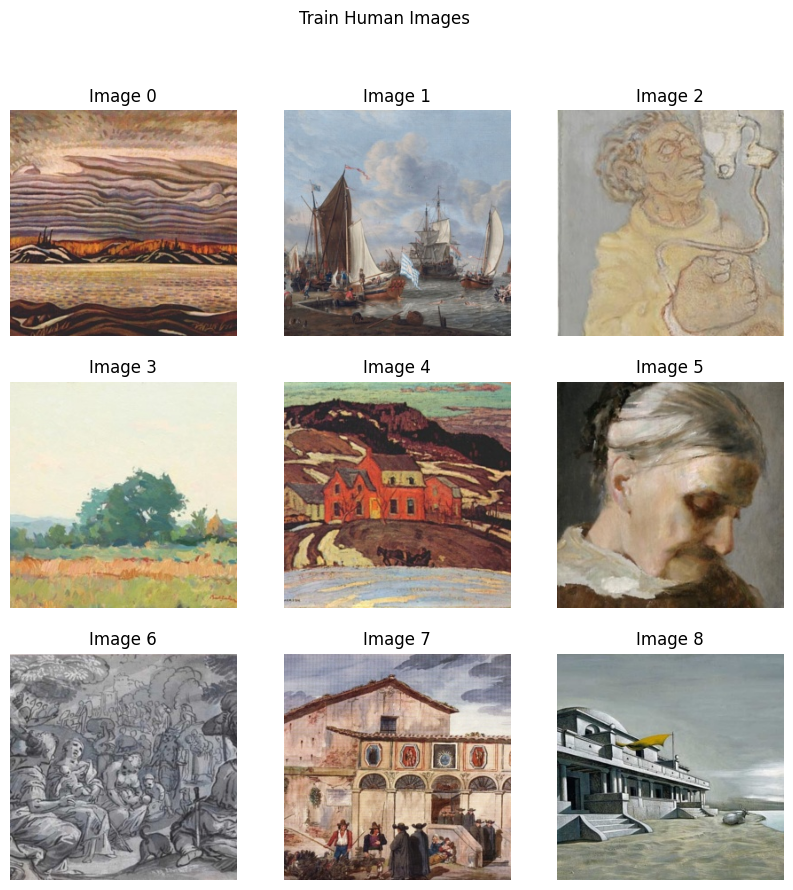

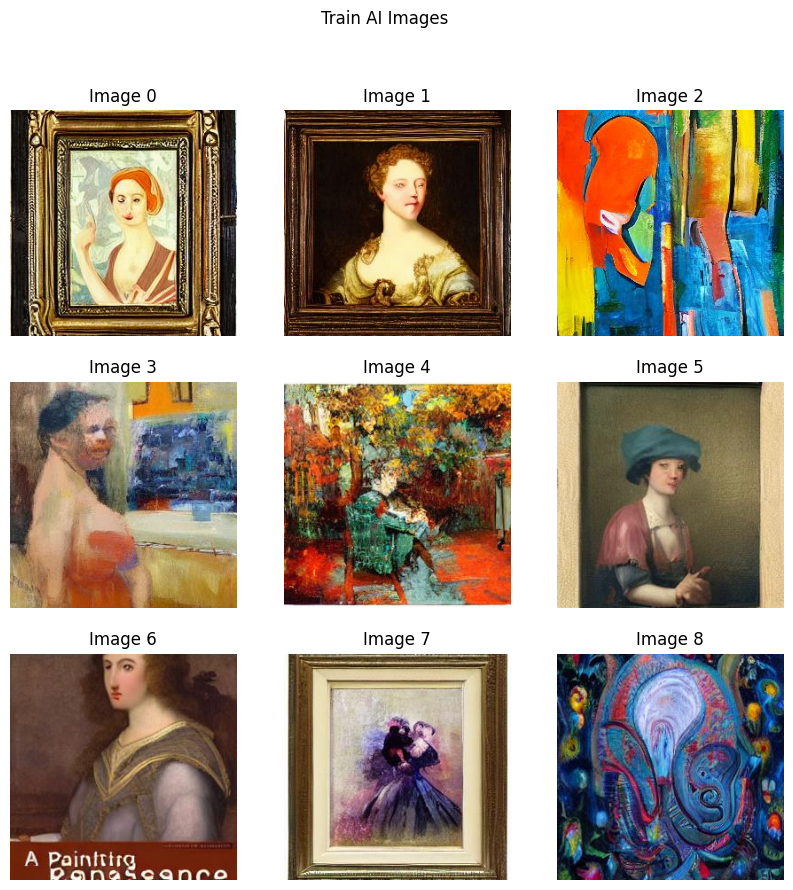

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_images(images, title):
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    fig.suptitle(title)

    for i, ax in enumerate(axes.flat):
        if i < len(images):
            image_path = os.path.join(images[i], os.listdir(images[i])[0])
            image = mpimg.imread(image_path)
            ax.imshow(image)
            ax.axis('off')
            ax.set_title(f"Image {i}")
        else:
            ax.axis('off')

    plt.show()

# Visualize human-drawn images in a 3x3 grid
plot_images(train_human, "Train Human Images")

# Visualize AI-generated images in a 3x3 grid
plot_images(train_ai, "Train AI Images")

# Similarly, you can visualize images in the test_human and test_ai lists


In [9]:
# Initialize lists to store file paths and labels
file_paths = []
labels = []

# Initialize an empty DataFrame for train_data
train_data = pd.DataFrame(columns=['File_Path', 'Label'])

# Label files under train_human as "human"
for directory in train_human:
    for file in os.listdir(directory):
        file_paths.append(os.path.join(directory, file))
        labels.append('human')

# Label files under train_ai as "AI"
for directory in train_ai:
    for file in os.listdir(directory):
        file_paths.append(os.path.join(directory, file))
        labels.append('AI')

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'File_Path': file_paths, 'Label': labels})

# Concatenate data with train_data
train_data = pd.concat([train_data, data], ignore_index=True)

In [10]:
# Count the number of files under each label
label_counts = train_data['Label'].value_counts()

# Print the counts
print("Counts of files under each label:")
print(label_counts)

Counts of files under each label:
Label
AI       52092
human    50000
Name: count, dtype: int64


Counts of files under each label:
Label
AI       52092
human    50000
Name: count, dtype: int64


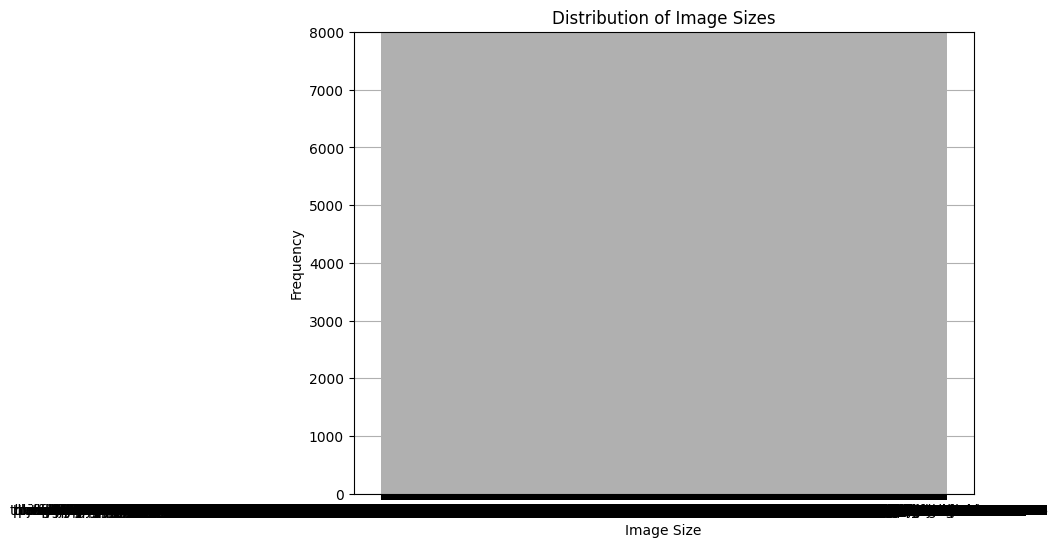

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Initialize lists to store file paths, labels, and image sizes
file_paths = []
labels = []
image_sizes = []

# Initialize an empty DataFrame for train_data
train_data = pd.DataFrame(columns=['File_Path', 'Label', 'Image_Size'])

# Function to get the size of the image
def get_image_size(file_path):
    # Extract the size of the image from the file path
    size = os.path.splitext(file_path)[0].split('_')[-1]
    return size


# Label files under train_human as "human"
for directory in train_human:
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        file_paths.append(file_path)
        labels.append('human')
        image_size = get_image_size(file_path)
        image_sizes.append(image_size)

# Label files under train_ai as "AI"
for directory in train_ai:
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        file_paths.append(file_path)
        labels.append('AI')
        image_size = get_image_size(file_path)
        image_sizes.append(image_size)

# Create a DataFrame with file paths, labels, and image sizes
data = pd.DataFrame({'File_Path': file_paths, 'Label': labels, 'Image_Size': image_sizes})

# Concatenate data with train_data
train_data = pd.concat([train_data, data], ignore_index=True)

# Count the number of files under each label
label_counts = train_data['Label'].value_counts()

# Print the counts
print("Counts of files under each label:")
print(label_counts)

# Visualize the image sizes
plt.figure(figsize=(8, 6))
plt.hist(train_data['Image_Size'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Image Sizes')
plt.xlabel('Image Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


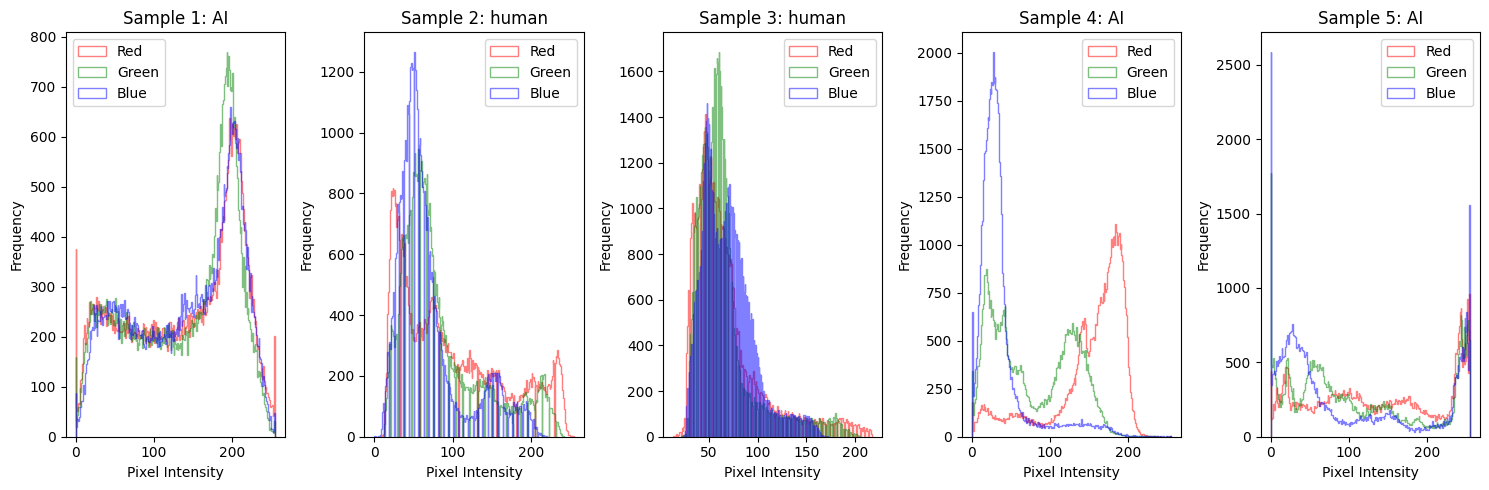

In [19]:
import cv2
# Function to read image and extract RGB channels
def get_image_rgb(file_path):
    image = cv2.imread(file_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert image to RGB
    return image_rgb

# Read and plot RGB histograms for a sample of images
sample_images = train_data.sample(5)  # Change 5 to the desired number of sample images
plt.figure(figsize=(15, 5))


for i, (_, row) in enumerate(sample_images.iterrows(), 1):
    image_rgb = get_image_rgb(row['File_Path'])
    plt.subplot(1, len(sample_images), i)
    plt.title(f"Sample {i}: {row['Label']}")
    plt.hist(image_rgb[:,:,0].ravel(), bins=256, color='red', alpha=0.5, label='Red', histtype='step')
    plt.hist(image_rgb[:,:,1].ravel(), bins=256, color='green', alpha=0.5, label='Green', histtype='step')
    plt.hist(image_rgb[:,:,2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue', histtype='step')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

In [18]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user10\Desktop\APU Year 3 Degree Semester 2\Deep Learning\ODL\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [12]:
# Initialize lists to store file paths and labels
file_paths = []
labels = []

# Initialize an empty DataFrame for train_data
test_data = pd.DataFrame(columns=['File_Path', 'Label'])

# Label files under train_human as "human"
for directory in test_human:
    for file in os.listdir(directory):
        file_paths.append(os.path.join(directory, file))
        labels.append('human')

# Label files under train_ai as "AI"
for directory in test_ai:
    for file in os.listdir(directory):
        file_paths.append(os.path.join(directory, file))
        labels.append('AI')

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'File_Path': file_paths, 'Label': labels})

# Concatenate data with train_data
test_data = pd.concat([test_data, data], ignore_index=True)

In [13]:
# Count the number of files under each label
label_counts_test = test_data['Label'].value_counts()

# Print the counts
print("Counts of files under each label:")
print(label_counts_test)

Counts of files under each label:
Label
human    10000
AI       10000
Name: count, dtype: int64


## **Reducing data and balancing data**

# **train data**

In [14]:
np.random.seed(42)

# Number of rows to drop for the 'AI' label
num_rows_to_drop = 2092

# Get the indices of rows with the 'AI' label
ai_indices = train_data[train_data['Label'] == 'AI'].index

# Randomly select indices to drop using the specified seed
indices_to_drop = np.random.choice(ai_indices, num_rows_to_drop, replace=False)

# Drop the selected rows from the DataFrame
train_data.drop(indices_to_drop, inplace=True)

# Reset the index of the DataFrame after dropping rows
train_data.reset_index(drop=True, inplace=True)

In [15]:
# Count the number of files under each label
label_counts = train_data['Label'].value_counts()

# Print the counts
print("Counts of files under each label:")
print(label_counts)

Counts of files under each label:
Label
human    50000
AI       50000
Name: count, dtype: int64


## **VGG16: Creating train and test**

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,    # Normalize the image
    rotation_range=40, # Randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2, # Randomly shift images horizontally
    height_shift_range=0.2, # Randomly shift images vertically
    shear_range=0.2, # Randomly apply shearing transformations
    zoom_range=0.2, # Randomly zoom inside pictures
    horizontal_flip=True, # Randomly flip images horizontally
    fill_mode='nearest' # Set strategy for filling in newly created pixels
)


test_datagen = ImageDataGenerator(
    rescale=1./255  # For test data, normalization is usually only necessary
)

In [17]:
train_dataset = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='File_Path',  # Column containing file paths
    y_col='Label',     # Column containing labels
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

test_dataset = test_datagen.flow_from_dataframe(
    dataframe=test_data,  #
    target_size=(224, 224),  # All images will be resized to 240x240
    x_col='File_Path',  # Column containing file paths
    y_col='Label',     # Column containing labels
    batch_size=64,
    class_mode='categorical',
    shuffle = False
)

Found 100000 validated image filenames belonging to 2 classes.
Found 20000 validated image filenames belonging to 2 classes.


In [18]:
print(train_dataset.class_indices)
print(test_dataset.class_indices)

{'AI': 0, 'human': 1}
{'AI': 0, 'human': 1}


In [19]:
from keras.applications import VGG16 #type:ignore
# Load the VGG16 model, pre-trained on ImageNet data, exclude the top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.summary()
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Create a new model on top
from keras.models import Sequential #type:ignore
from keras.layers import Dense, MaxPooling2D, Flatten, Dropout,GlobalAveragePooling2D#type:ignore
model = Sequential()
model.add(base_model)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # 2 classes

In [ ]:
from keras.optimizers import Adam #type:ignore
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Show the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 512)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               2359808   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                      

Epoch 1/10
1563/1563 [==============================] - 1896s 1s/step - loss: 0.2926 - accuracy: 0.8732 - val_loss: 0.1881 - val_accuracy: 0.9244
Epoch 2/10
1563/1563 [==============================] - 1318s 843ms/step - loss: 0.2230 - accuracy: 0.9070 - val_loss: 0.1768 - val_accuracy: 0.9289
Epoch 3/10
1563/1563 [==============================] - 1334s 853ms/step - loss: 0.2036 - accuracy: 0.9162 - val_loss: 0.1506 - val_accuracy: 0.9416
Epoch 4/10
1563/1563 [==============================] - 1424s 911ms/step - loss: 0.1921 - accuracy: 0.9214 - val_loss: 0.1392 - val_accuracy: 0.9463
Epoch 5/10
1563/1563 [==============================] - 1441s 922ms/step - loss: 0.1823 - accuracy: 0.9256 - val_loss: 0.1532 - val_accuracy: 0.9371
Epoch 6/10
1563/1563 [==============================] - 1422s 910ms/step - loss: 0.1762 - accuracy: 0.9288 - val_loss: 0.1275 - val_accuracy: 0.9518
Epoch 7/10
1563/1563 [==============================] - 1313s 840ms/step - loss: 0.1721 - accuracy: 0.9303 - 

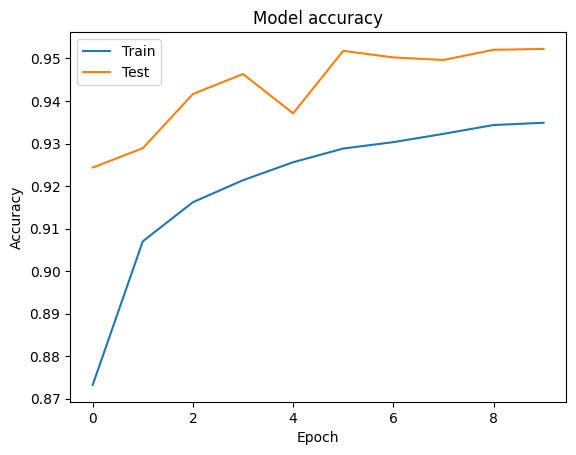

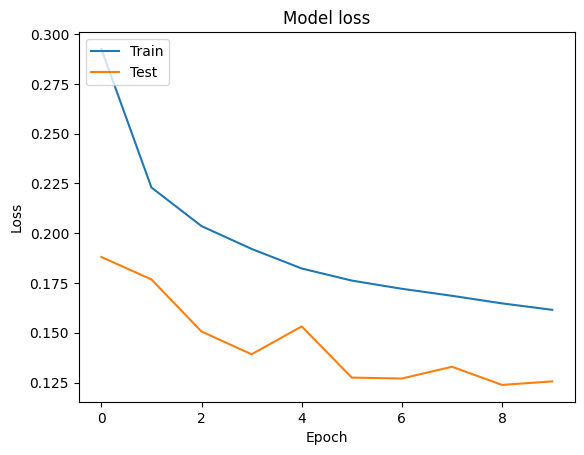

In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_dataset),
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=test_dataset,
    validation_steps=len(test_dataset)
)

# Plot training history
import matplotlib.pyplot as plt #type:ignore

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


313/313 [==============================] - 165s 528ms/step
[[9558  442]
 [ 513 9487]]


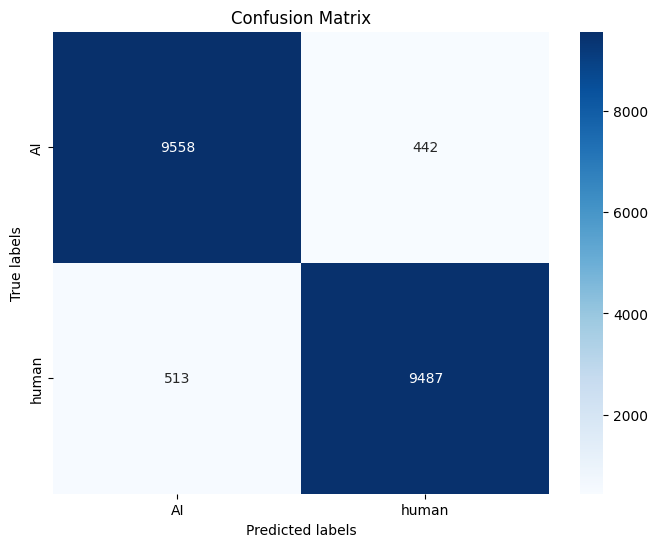

In [ ]:
from sklearn.metrics import confusion_matrix #type:ignore
import numpy as np #type:ignore
 
# Predict labels for the test dataset
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
true_labels = test_dataset.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred_classes)

# Display the confusion matrix
print(conf_matrix)

import seaborn as sns#type:ignore

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.class_indices.keys(),
            yticklabels=test_dataset.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Second Model

In [ ]:

# Add additional layers on top of VGG16
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D(input_shape=(224,224,3)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))  # Additional dense layer
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))  # Additional dense layer
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))  # Additional dense layer
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))  # Additional dense layer
model.add(Dropout(0.4))

model.add(Dense(2, activation='sigmoid'))  # 2 classes



In [ ]:
from keras.optimizers import Adam #type:ignore
# Compile the model
model.compile(optimizer=Adam(lr=0.0005/10), loss='binary_crossentropy', metrics=['accuracy'])

# Show the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_22 (Dense)            (None, 32)                16416     
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 64)                2112      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                      

Epoch 1/10
1563/1563 [==============================] - 1606s 1s/step - loss: 0.5228 - accuracy: 0.7177 - val_loss: 0.3239 - val_accuracy: 0.8568
Epoch 2/10
1563/1563 [==============================] - 1613s 1s/step - loss: 0.3400 - accuracy: 0.8564 - val_loss: 0.2738 - val_accuracy: 0.8872
Epoch 3/10
1563/1563 [==============================] - 1389s 888ms/step - loss: 0.3046 - accuracy: 0.8740 - val_loss: 0.2499 - val_accuracy: 0.8982
Epoch 4/10
1563/1563 [==============================] - 1367s 875ms/step - loss: 0.2860 - accuracy: 0.8807 - val_loss: 0.2365 - val_accuracy: 0.9047
Epoch 5/10
1563/1563 [==============================] - 1366s 874ms/step - loss: 0.2728 - accuracy: 0.8881 - val_loss: 0.2247 - val_accuracy: 0.9097
Epoch 6/10
1563/1563 [==============================] - 1442s 922ms/step - loss: 0.2634 - accuracy: 0.8923 - val_loss: 0.2172 - val_accuracy: 0.9146
Epoch 7/10
1563/1563 [==============================] - 1500s 959ms/step - loss: 0.2509 - accuracy: 0.8975 - val

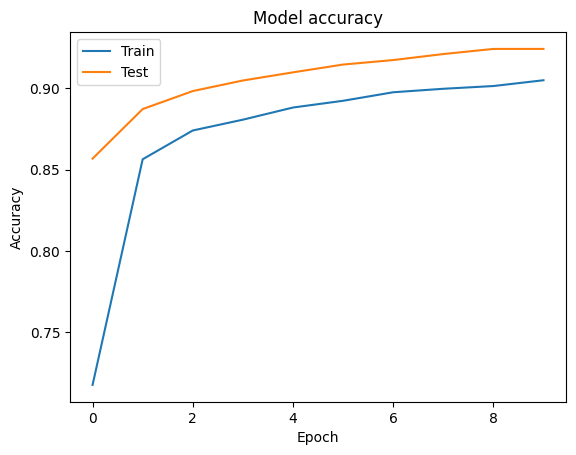

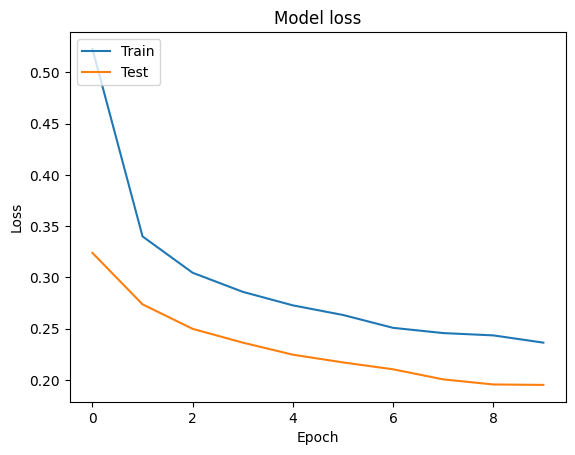

In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_dataset),
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=test_dataset,
    validation_steps=len(test_dataset)
)

# Plot training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


313/313 [==============================] - 163s 521ms/step


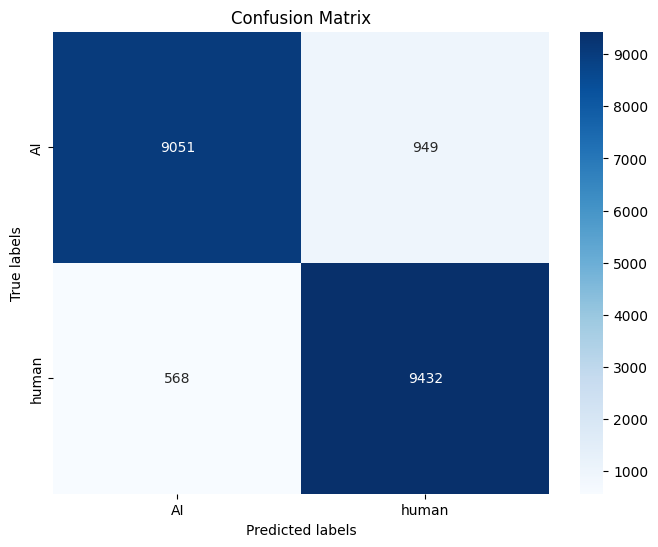

In [ ]:
# Predict labels for the test dataset
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
true_labels = test_dataset.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.class_indices.keys(),
            yticklabels=test_dataset.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Third Model

In [23]:
import keras_tuner as kt #type:ignore
from keras.callbacks import EarlyStopping#type:ignore
from tensorflow.keras.models import Sequential#type:ignore
from tensorflow.keras.layers import Dense, Dropout,GlobalAveragePooling2D#type:ignore
from keras.optimizers import Adam#type:ignore
# Define the hypermodel and search space
def model_builder(hp):
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D(input_shape=(224, 224, 3)))
    model.add(Dense(units=hp.Choice('units_1', values=[64, 128, 256, 512]), activation='relu'))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

    for i in range(hp.Int('num_dense_layers', 1, 4)):
        model.add(Dense(units=hp.Int(f'units_{i+2}', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_{i+2}', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(2, activation='sigmoid'))

    optimizer = Adam(hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create the tuner and search
tuner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=3,  # Number of models to try
    executions_per_trial=2,  # Number of times to fit the model
    directory='random_search',
    project_name='vgg16_tuning'
)

# Perform the search
tuner.search(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    callbacks=[EarlyStopping(patience=3)]
)

# Get the best model
best_model = tuner.get_best_models()[0]

Trial 3 Complete [05h 42m 43s]
val_accuracy: 0.9445750117301941

Best val_accuracy So Far: 0.9445750117301941
Total elapsed time: 18h 53m 11s


In [24]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 448)               229824    
                                                                 
 dropout_1 (Dropout)         (None, 448)               0         
                                                        

In [22]:
from keras.applications import VGG16 #type:ignore
# Load the VGG16 model, pre-trained on ImageNet data, exclude the top fully connected layers
best_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in best_model.layers:
    layer.trainable = False


# Create a new model
best_model = Sequential()

# Add the VGG16 base model
best_model.add(base_model)

# Add global average pooling layer
best_model.add(GlobalAveragePooling2D())

# Add dense layer
best_model.add(Dense(512, activation='relu'))

# Add dropout layer
best_model.add(Dropout(0.5))

# Add another dense layer
best_model.add(Dense(448, activation='relu'))

# Add another dropout layer
best_model.add(Dropout(0.5))

# Add output layer
best_model.add(Dense(2, activation='softmax'))


In [27]:
# Compile the model
best_model.compile(optimizer=Adam(learning_rate=0.001), 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])


# Assuming you have train_data and test_data and train_labels and test_labels
# Train the model
# Train the model
history = best_model.fit(
    train_dataset,  # Assuming train_dataset is a DataFrameIterator object
    steps_per_epoch=len(train_dataset),
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=test_dataset,  # Assuming test_dataset is a DataFrameIterator object
    validation_steps=len(test_dataset)
)

Epoch 1/10
1563/1563 [==============================] - 1574s 1s/step - loss: 0.2843 - accuracy: 0.8791 - val_loss: 0.1791 - val_accuracy: 0.9293
Epoch 2/10
1563/1563 [==============================] - 1449s 927ms/step - loss: 0.2279 - accuracy: 0.9054 - val_loss: 0.1761 - val_accuracy: 0.9299
Epoch 3/10
1563/1563 [==============================] - 1448s 926ms/step - loss: 0.2124 - accuracy: 0.9127 - val_loss: 0.1625 - val_accuracy: 0.9350
Epoch 4/10
1563/1563 [==============================] - 1375s 879ms/step - loss: 0.2008 - accuracy: 0.9180 - val_loss: 0.1746 - val_accuracy: 0.9295
Epoch 5/10
1563/1563 [==============================] - 1316s 842ms/step - loss: 0.1960 - accuracy: 0.9194 - val_loss: 0.1458 - val_accuracy: 0.9412
Epoch 6/10
1563/1563 [==============================] - 1345s 860ms/step - loss: 0.1895 - accuracy: 0.9241 - val_loss: 0.1552 - val_accuracy: 0.9377
Epoch 7/10
1563/1563 [==============================] - 1339s 856ms/step - loss: 0.1885 - accuracy: 0.9236 - 

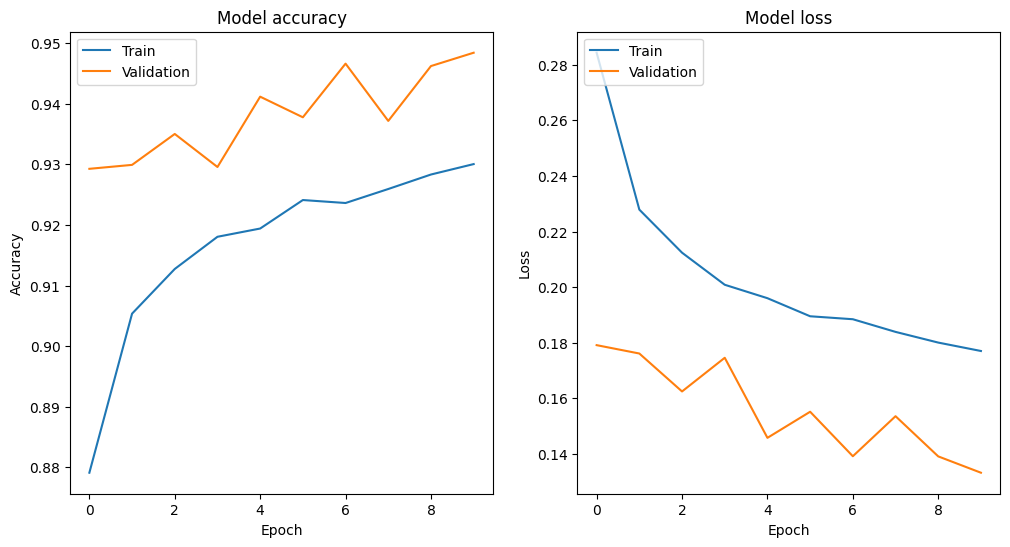

313/313 [==============================] - 157s 500ms/step


: 

In [28]:


# Plot accuracy and loss graph
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(best_model.history.history['accuracy'])
plt.plot(best_model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(best_model.history.history['loss'])
plt.plot(best_model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Predict classes for test data
y_pred = np.argmax(best_model.predict(test_dataset), axis=1)

# Get true classes for test data
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [1]:
# import shutil

# # Delete the directory and its contents
# shutil.rmtree('random_search/vgg16_tuning')
